<a href="https://colab.research.google.com/github/OjoJosh7/Machine-Learning/blob/main/Pyspark_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analyzing New York Taxi Data Using PySpark on Azure (Free Tier)**

#### **Introduction**
You are a data engineer at a transportation analytics company. Your team has been tasked with analyzing the New York City taxi dataset to uncover insights that can help improve taxi services, optimize routes, and understand customer behavior. The dataset is large, but you decide to use PySpark on Azure Databricks to handle the data processing efficiently.

---

### **Step 1: Setting Up the Environment**
**Story:**  
You start by setting up your cloud environment. Azure Databricks is chosen because it provides a collaborative, scalable, and managed platform for big data analytics with PySpark. You create a Databricks workspace and a small cluster, and configure it to read data from an Azure Blob Storage account where the dataset is stored.

**Mini Tasks:**
1. Create a free Azure account if you don’t already have one.
2. Set up an Azure Blob Storage account and upload a subset of the New York taxi dataset (e.g., `trip_data.csv` and `trip_fare.csv`).
3. Create an Azure Databricks workspace and launch a small cluster with PySpark installed.
4. Mount the Blob Storage container to your Databricks workspace using the `abfss` protocol or a SAS token.
5. Verify that PySpark is working by running a simple script to print "Hello, PySpark!"

---

### **Step 2: Loading and Exploring the Data**
**Story:**  
With the environment ready, you load the dataset into PySpark DataFrames. The dataset contains information about taxi trips, including pickup/dropoff locations, timestamps, trip distances, fares, and payment types. You begin by exploring the data to understand its structure and identify any quality issues.

**Mini Tasks:**
1. Load a subset of the `trip_data.csv` and `trip_fare.csv` files from Blob Storage into PySpark DataFrames.
2. Print the schema of both DataFrames to understand the column names and data types.
3. Check for missing values and duplicates in the dataset.
4. Display the first 5 rows of each DataFrame to get a sense of the data.

---

### **Step 3: Data Cleaning and Transformation**
**Story:**  
You notice some inconsistencies in the data, such as missing values in the `passenger_count` column and incorrect timestamps. You decide to clean the data by removing invalid records and transforming columns into the correct formats.

**Mini Tasks:**
1. Drop rows with missing values in critical columns like `pickup_datetime`, `dropoff_datetime`, and `trip_distance`.
2. Convert the `pickup_datetime` and `dropoff_datetime` columns to timestamp format.
3. Filter out rows where `trip_distance` is 0 or negative.
4. Create a new column `trip_duration` by calculating the difference between `dropoff_datetime` and `pickup_datetime`.

---

### **Step 4: Joining Datasets**
**Story:**  
To get a complete picture of each trip, you decide to join the `trip_data` and `trip_fare` DataFrames using a common key, such as `medallion` and `hack_license`. This will allow you to analyze both trip details and fare information together.

**Mini Tasks:**
1. Identify the common columns between `trip_data` and `trip_fare` DataFrames.
2. Perform an inner join on the two DataFrames using the common columns.
3. Verify the join by checking the row count and inspecting the resulting DataFrame.

---

### **Step 5: Analyzing the Data**
**Story:**  
With the cleaned and joined dataset, you start analyzing it to uncover insights. You focus on answering key questions, such as:
- What is the average trip duration and fare?
- Which payment methods are most popular?
- What are the peak hours for taxi rides?

**Mini Tasks:**
1. Calculate the average `trip_duration` and `fare_amount`.
2. Group the data by `payment_type` and count the number of trips for each payment method.
3. Extract the hour from `pickup_datetime` and create a histogram to visualize peak hours.
4. Identify the top 5 pickup and dropoff locations based on trip frequency.

---

### **Step 6: Visualizing the Results**
**Story:**  
To make your findings more accessible, you decide to visualize the results using Databricks' built-in visualization tools or a Python library like Matplotlib or Seaborn. You export the aggregated data from PySpark to a Pandas DataFrame for easier plotting.

**Mini Tasks:**
1. Export the results of your analysis (e.g., average fare, peak hours) to a Pandas DataFrame.
2. Create a bar chart to show the distribution of payment types.
3. Plot a line chart to visualize the number of trips per hour (peak hours).
4. Generate a scatter plot to explore the relationship between `trip_distance` and `fare_amount`.

---

### **Step 7: Saving the Results**
**Story:**  
Finally, you save the cleaned dataset and analysis results back to Blob Storage for future use. You also document your findings in a report that will be shared with your team.

**Mini Tasks:**
1. Save the cleaned and joined DataFrame as a Parquet file in your Blob Storage account.
2. Export the aggregated results (e.g., peak hours, payment types) as a CSV file to Blob Storage.
3. Write a brief summary of your findings in a Markdown file and upload it to Blob Storage.

---

### **Conclusion**
**Story:**  
You’ve successfully built a PySpark pipeline to analyze the New York taxi dataset on Azure. Your analysis revealed valuable insights, such as peak hours, popular payment methods, and average trip durations. These findings will help your team make data-driven decisions to improve taxi services in New York City.

**Mini Tasks:**
1. Terminate the Databricks cluster to avoid unnecessary costs.
2. Share the Blob Storage links to the cleaned data, analysis results, and report with your team.

---

### **Bonus Challenge**
- Use PySpark MLlib to build a simple machine learning model that predicts taxi fares based on features like `trip_distance` and `trip_duration`.
- Explore geospatial analysis by visualizing pickup and dropoff locations on a map using libraries like Folium or Databricks' built-in mapping tools.

---

### **Tips for Staying Within Free Tier Limits**
1. Use a **small cluster** in Databricks and terminate it immediately after completing tasks.
2. Work with a **subset of the dataset** (e.g., 1-2 months of data) to reduce processing time and resource usage.
3. Use **compressed file formats** like Parquet or GZIP to save storage space in Blob Storage.
4. Monitor your usage in the Azure portal to ensure you stay within the free tier limits.

---

This project provides a hands-on experience with PySpark, Azure Databricks, and data analysis.

In [2]:
import pyspark
from pyspark.sql.functions import col, isnan, sum
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("LoadParquet") \
        .getOrCreate()
parquet_path = "sample_data/yellow_tripdata_2025-01.parquet"  # File path
df = spark.read.parquet(parquet_path)

# To print the schema and check for data types
df.printSchema()





root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)



In [3]:
# To check for duplicates
df_duplicates = df.groupBy(df.columns).count().filter(col("count") > 1)
df_duplicates.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-----+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|count|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-----+
+--------+--------------------+---------------------+---------------+-------------+----------+------------------

In [4]:
# using sum for a concise view of all columns to check for missing values
df.select([sum(col(c).isNull().cast("integer")).alias(c) for c in df.columns]).show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       0|                   0|                    0|         540149|            0|    540149|            540149|           0|    

In [6]:
# Count nulls for all columns
for column in df.columns:
    print(f"Column '{column}': Null count = {df.filter(col(column).isNull()).count()}")


Column 'VendorID': Null count = 0
Column 'tpep_pickup_datetime': Null count = 0
Column 'tpep_dropoff_datetime': Null count = 0
Column 'passenger_count': Null count = 540149
Column 'trip_distance': Null count = 0
Column 'RatecodeID': Null count = 540149
Column 'store_and_fwd_flag': Null count = 540149
Column 'PULocationID': Null count = 0
Column 'DOLocationID': Null count = 0
Column 'payment_type': Null count = 0
Column 'fare_amount': Null count = 0
Column 'extra': Null count = 0
Column 'mta_tax': Null count = 0
Column 'tip_amount': Null count = 0
Column 'tolls_amount': Null count = 0
Column 'improvement_surcharge': Null count = 0
Column 'total_amount': Null count = 0
Column 'congestion_surcharge': Null count = 540149
Column 'Airport_fee': Null count = 540149
Column 'cbd_congestion_fee': Null count = 0


In [5]:
df.show()


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|    

In [8]:
# Using column object to filter out roles where trip distance is zero or negative
filtered_df = df.filter(col("trip_distance") > 0)
filtered_df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|    

In [19]:
from pyspark.sql.functions import unix_timestamp

# Create 'trip_duration' by subtracting drop 0ff time from pick up time
df = filtered_df.withColumn("trip_duration", unix_timestamp(col("tpep_dropoff_datetime")) - unix_timestamp(col("tpep_pickup_datetime")))
df.show(4)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|trip_duration|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|     

In [20]:
from pyspark.sql import functions as F
# Average of trip_duration
avg_trip_duration_df = df.agg(F.avg("trip_duration"))
avg_trip_duration_df.show()

+------------------+
|avg(trip_duration)|
+------------------+
| 906.4724570543146|
+------------------+



In [21]:
# Average of fare_amount
avg_fare_amount_df = filtered_df.agg(F.avg("fare_amount"))
avg_fare_amount_df.show()

+-----------------+
| avg(fare_amount)|
+-----------------+
|17.06633026951292|
+-----------------+



In [22]:
from pyspark.sql.functions import hour, count

# Grouping by payment type
payment_type_counts = df.groupBy("payment_type").count()
payment_type_counts.show()


+------------+-------+
|payment_type|  count|
+------------+-------+
|           1|2424744|
|           3|  18934|
|           2| 381503|
|           4|  70986|
|           0| 488166|
+------------+-------+



In [25]:
# Extract the hour and add it as a new column
df = df.withColumn("extracted_hour", hour(col("tpep_pickup_datetime")))
df.show(5)


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+--------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|trip_duration|extracted_hour|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+--------------+
|       1| 2025-01-01 00:18:38|  2025-01-01

In [27]:
from pyspark.sql.functions import col, count

# Group by extracted_hour and count the number of trips
hourly_counts = df.groupBy("extracted_hour").agg(count("*").alias("trip_count"))

# Order by hour for better visualization
hourly_counts = hourly_counts.orderBy("extracted_hour")

hourly_counts.show(24)

+--------------+----------+
|extracted_hour|trip_count|
+--------------+----------+
|             0|     92021|
|             1|     63340|
|             2|     43015|
|             3|     27689|
|             4|     19365|
|             5|     21988|
|             6|     49228|
|             7|    101343|
|             8|    139603|
|             9|    141105|
|            10|    146474|
|            11|    158110|
|            12|    173098|
|            13|    183665|
|            14|    199645|
|            15|    210789|
|            16|    208933|
|            17|    237547|
|            18|    246324|
|            19|    208732|
|            20|    192945|
|            21|    203907|
|            22|    180385|
|            23|    135082|
+--------------+----------+



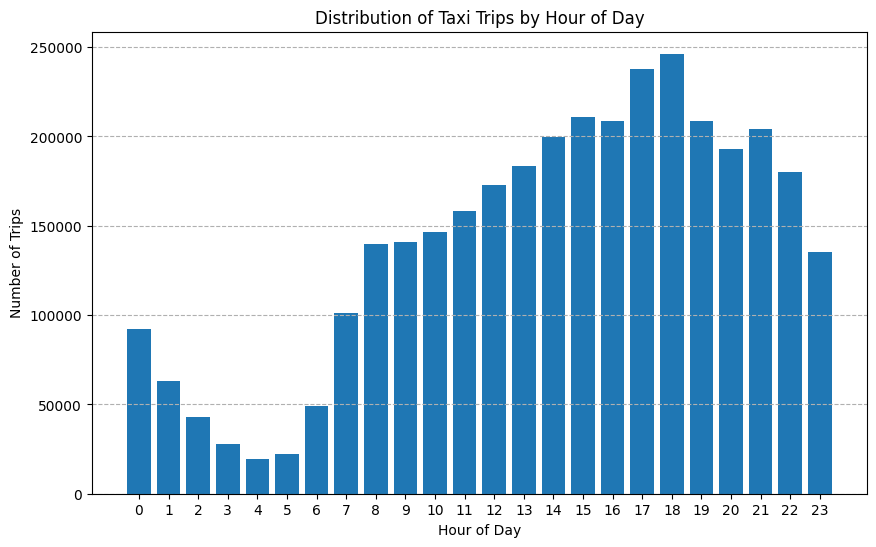

In [28]:
import matplotlib.pyplot as plt

# Convert the hourly counts to a Pandas DataFrame for plotting
hourly_counts_pd = hourly_counts.toPandas()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts_pd['extracted_hour'], hourly_counts_pd['trip_count'])
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Distribution of Taxi Trips by Hour of Day")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--')
plt.show()

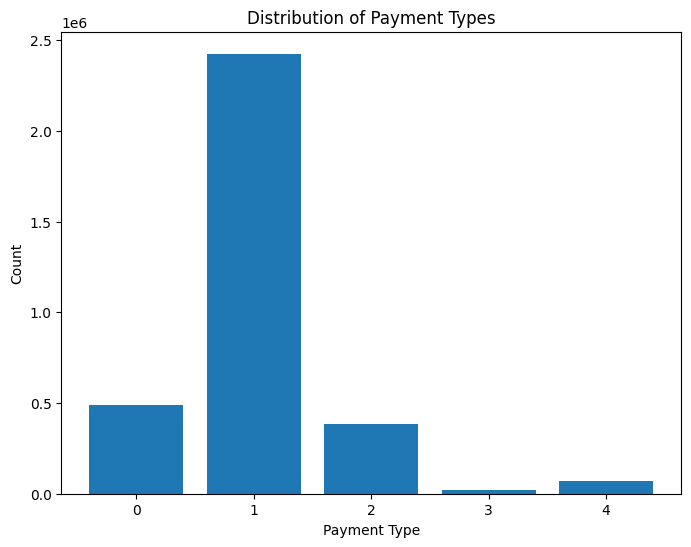

In [30]:
# Bar chart to viualize the distribution of payment types
plt.figure(figsize=(8, 6))
plt.bar(payment_type_counts.select("payment_type").rdd.flatMap(lambda x: x).collect(), payment_type_counts.select("count").rdd.flatMap(lambda x: x).collect())
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.show()

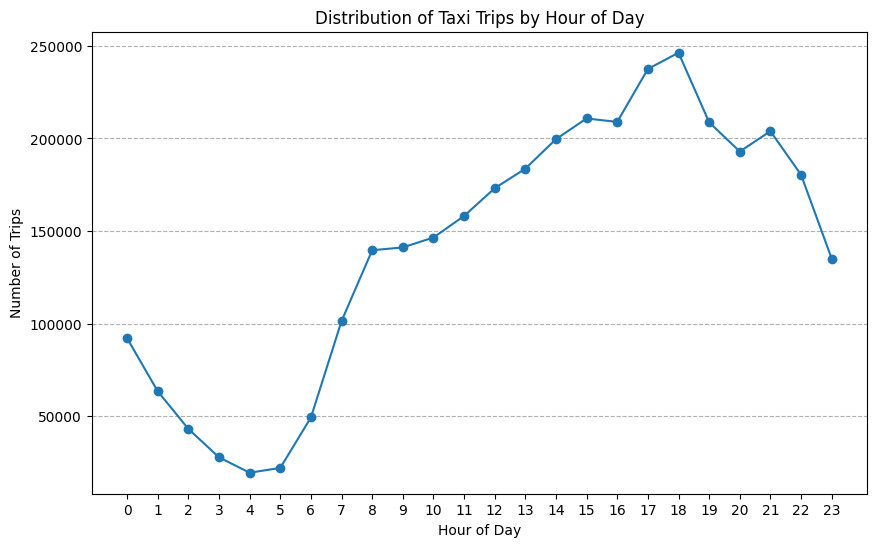

In [31]:
# Line chart to visualize the number of trips per hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts_pd['extracted_hour'], hourly_counts_pd['trip_count'], marker='o')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Distribution of Taxi Trips by Hour of Day")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--')
plt.show()




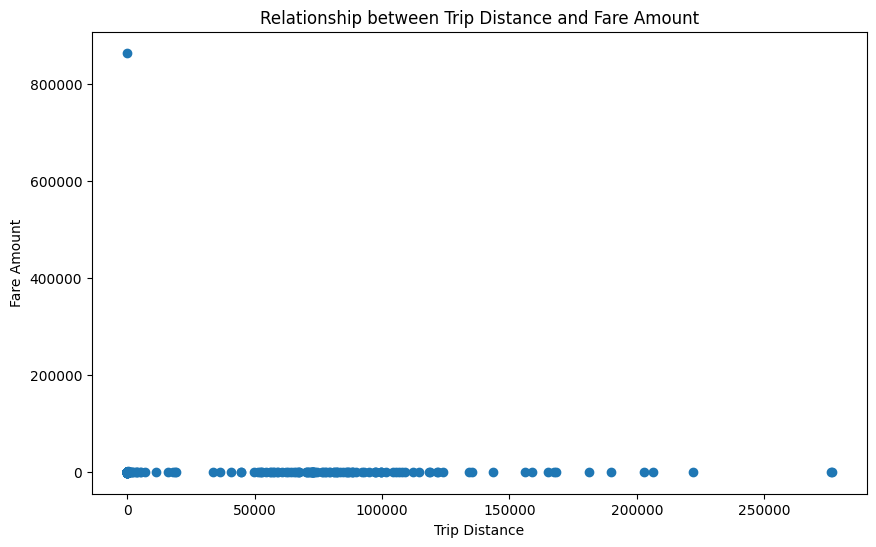

In [32]:
# A scatter plot to explore the relationship between trip distance and fare amount
plt.figure(figsize=(10, 6))
plt.scatter(df.select("trip_distance").rdd.flatMap(lambda x: x).collect(), df.select("fare_amount").rdd.flatMap(lambda x: x).collect())
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Relationship between Trip Distance and Fare Amount")
plt.show()

In [35]:
# Save the cleaned and joined DataFrame as a Parquet file
# Replace "your_blob_storage_path" with the actual path to your Azure Blob Storage container
cleaned_data_path = "your_blob_storage_path/cleaned_taxi_data.parquet"
df.write.parquet(cleaned_data_path, mode="overwrite")

print(f"Cleaned data saved to {cleaned_data_path}")

Cleaned data saved to your_blob_storage_path/cleaned_taxi_data.parquet
